<center> <h2> The Perceptron

#### Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

#### Imports and Settings


In [2]:
df = pd.read_csv('Data.csv')
df.head()

,feature_1,feature_2,class_label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0


### Preparing the Data

In [3]:
X = df.drop('class_label', axis = 1)
y = df['class_label']
print("The shape of X and y is:", X.shape, y.shape)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

The shape of X and y is: (100, 2) (100,)


In [4]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [5]:
import random

random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

### Plotting the Data


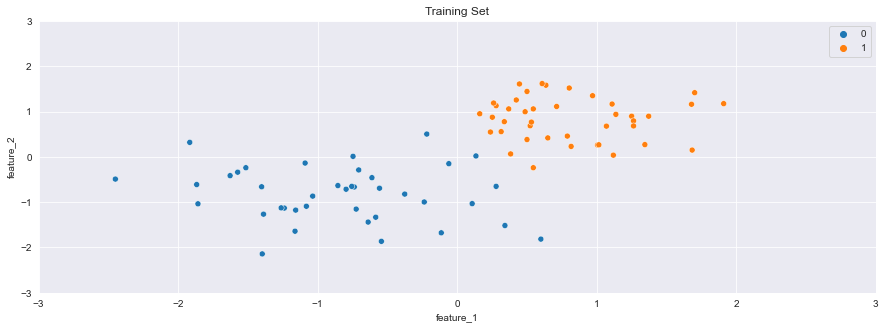

In [20]:
X_train_scaled = pd.DataFrame(data=X_train)
X_train_scaled.columns = ['feature_1', 'feature_2']

plt.title("Training Set")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
sns.scatterplot(x = X_train_scaled['feature_1'], y=  X_train_scaled['feature_2'], hue = y_train);

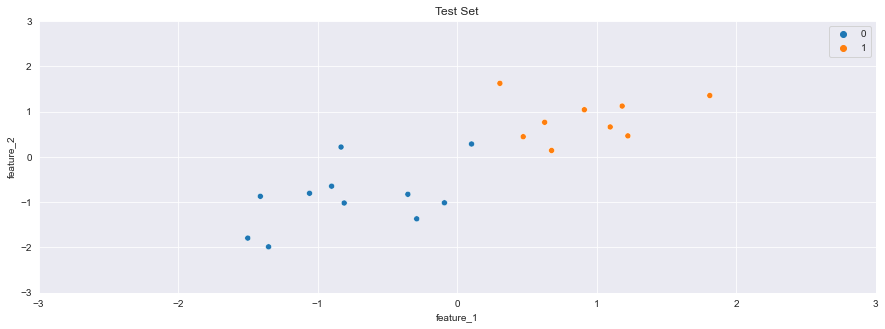

In [21]:
X_test_scaled = pd.DataFrame(data=X_test)
X_test_scaled.columns = ['feature_1', 'feature_2']

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Test Set")
sns.scatterplot(x = X_test_scaled['feature_1'], y=  X_test_scaled['feature_2'], hue = y_test);

### Defining the Perceptron model


In [8]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for i in range(num_features)] #
        self.bias = 0. #
    def forward(self, x):
        linear = sum([x[j]*self.weights[j] for j in range(self.num_features)]) + self.bias #
        prediction = 0 #
        if linear > 0.:
            prediction = 1
        return prediction  
    def backward(self, x, y):
        # to compute the prediction error
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(len(y)):
                # to update the weights and bias
                errors = self.backward(x[i], y[i])
                temp = [errors * x[i][j] for j in range(self.num_features)]
                self.weights = [(self.weights[j] + temp[j]) for j in range(self.num_features)]
                self.bias += errors
                
    def evaluate(self, x, y):
        # to compute the prediction accuracy
        predictions = [self.forward(x[i]) for i in range(len(x))]
        accuracy = 0
        for i in range(len(predictions)):
            if y[i] == predictions[i]:
                accuracy += 1
            return accuracy

### Training the Perceptron

In [9]:
ppn = Perceptron(num_features=2)
ppn.train(X_train, y_train, epochs=5)

In [10]:
print("Model parameters:\n\n")
print("Weights: %s\n" % ppn.weights)
print("Bias: %s\n" % ppn.bias)

Model parameters:


Weights: [3.0874769535231525, 1.0043566359618916]

Bias: -1.0



### Evaluating the model


In [11]:
train_acc = ppn.evaluate(X_train, y_train)
print("Train set accuracy: %.2f%%" % (train_acc*100))

Train set accuracy: 100.00%


In [12]:
test_acc = ppn.evaluate(X_test, y_test)
print("Test set accuracy: %.2f%%" % (test_acc*100))

Test set accuracy: 100.00%


### Decision Boundary


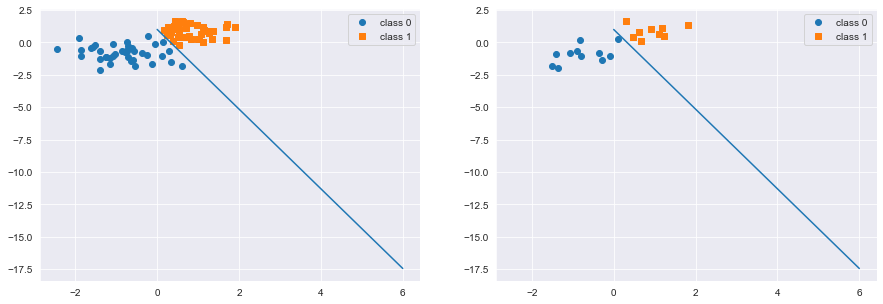

In [17]:
w, b = ppn.weights, ppn.bias

x_min = 0
y_min = ((-(w[0] * x_min) - b) / w[1])

x_max = 6
y_max = ((-(w[0] * x_max) - b) / w[1])

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
[i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
label="class 0", marker="o")

ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
[i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
label="class 1", marker="s")

ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0],
[i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
label="class 0", marker="o")

ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
[i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
label="class 1", marker="s")

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
plt.show()

<center><h2>THE END